## Importing Libraries and Dataset

In [17]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\farhan\Documents\CS UGM\DCSE_SummerCourse_2025\SIEM Dataset\Data.zip")

## Descriptive Statistics and Information of SIEM Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Dataset Description:
- step: Represents a unit of time in the simulation, where 1 step typically refers to one hour of elapsed time.
- type: The type of financial transaction. Possible values include:
- PAYMENT: A payment transaction.
- CASH_OUT: Withdrawal of cash.
- TRANSFER: Transfer of money between accounts.
- amount: The amount of money involved in the transaction.
- nameOrig: The account identifier of the origin account (the one sending or initiating the transaction).
- oldbalanceOrg: The balance of the origin account before the transaction occurred.
- newbalanceOrig: The balance of the origin account after the transaction occurred.
- nameDest: The account identifier of the destination account (the one receiving the funds).
- oldbalanceDest: The balance of the destination account before the transaction occurred.
- newbalanceDest: The balance of the destination account after the transaction occurred.
- isFraud: A binary indicator (0 or 1) representing whether the transaction is fraudulent (1) or not (0).
- isFlaggedFraud: A binary indicator (0 or 1) showing whether the transaction was flagged as fraudulent by the system, based on set rules for suspicious behavior.

This dataset can be used for a variety of purposes, such as:

Fraud detection model development and testing.

Exploratory data analysis to understand transaction behavior.

Anomaly detection in financial systems.

Data visualization for financial analytics.

In [21]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


6.3 Million Rows and 11 Columns

In [22]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [23]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The data is already Clean

## Exploratory Data Analysis

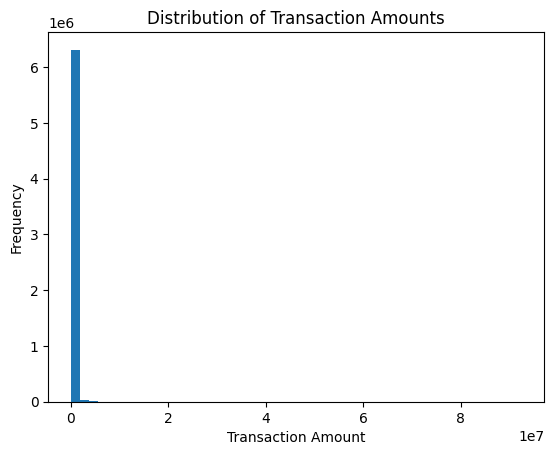

In [24]:
plt.hist(df['amount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

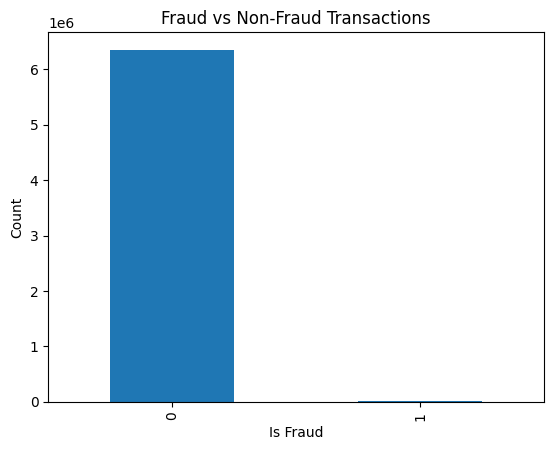

In [25]:
df['isFraud'].value_counts().plot(kind='bar')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

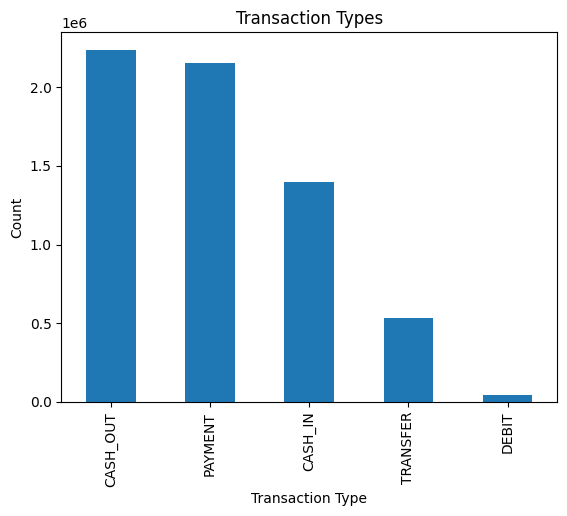

In [26]:
df['type'].value_counts().plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Types')
plt.show()

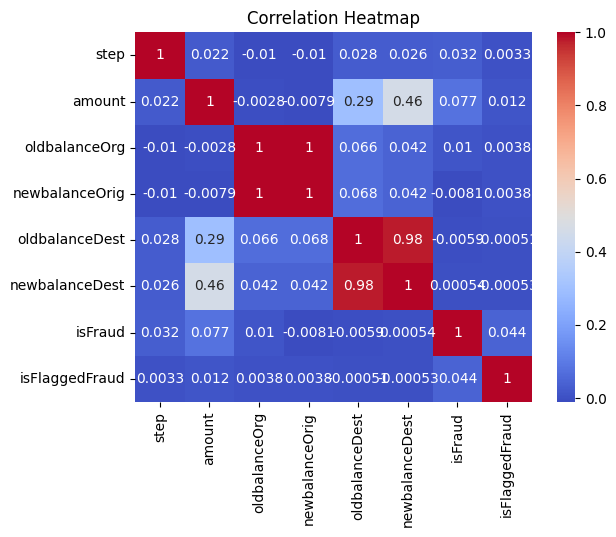

In [28]:
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

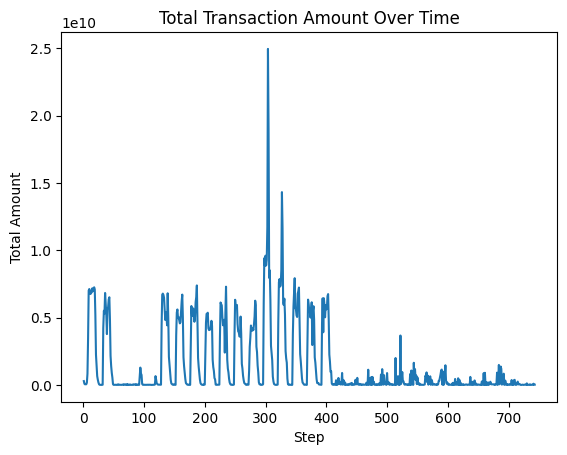

In [29]:
df.groupby('step')['amount'].sum().plot()
plt.xlabel('Step')
plt.ylabel('Total Amount')
plt.title('Total Transaction Amount Over Time')
plt.show()

The step column typically represents a unit of time, such as an hour or a time interval, in which transactions occurred. In the SIEM (Security Information and Event Management) dataset, each step value indicates the time sequence or period for each transaction, allowing you to analyze trends and patterns over time.

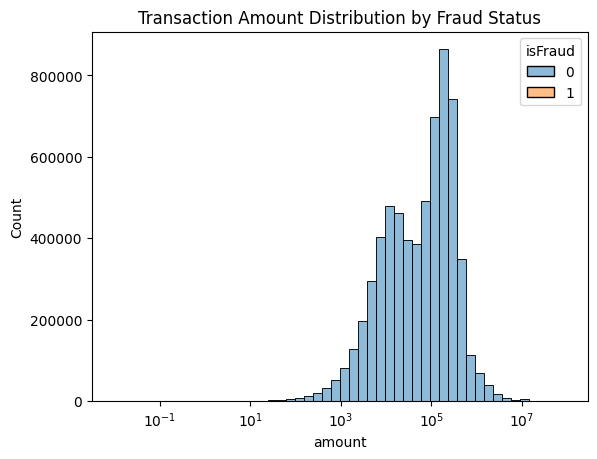

In [31]:
sns.histplot(data=df, x='amount', hue='isFraud', bins=50, log_scale=True)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

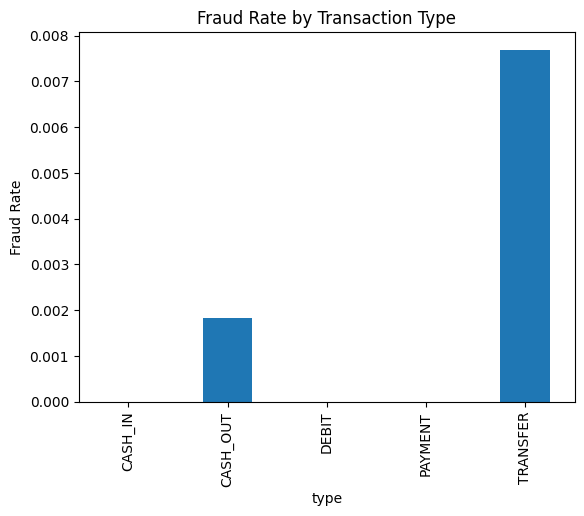

In [32]:
fraud_rate = df.groupby('type')['isFraud'].mean()
fraud_rate.plot(kind='bar')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Type')
plt.show()

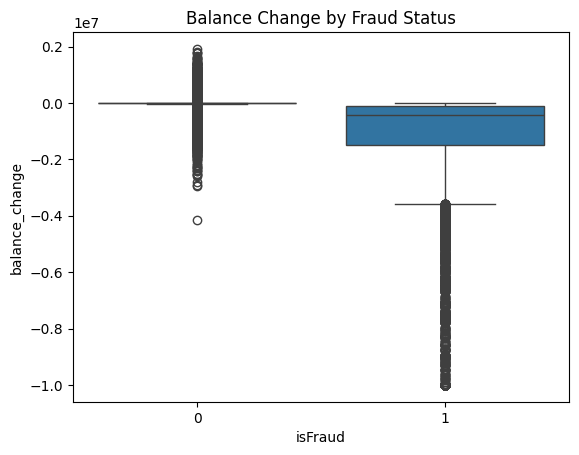

In [33]:
df['balance_change'] = df['newbalanceOrig'] - df['oldbalanceOrg']
sns.boxplot(x='isFraud', y='balance_change', data=df)
plt.title('Balance Change by Fraud Status')
plt.show()

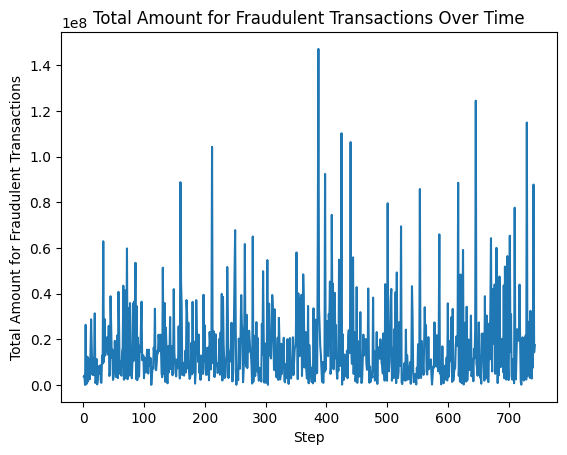

In [34]:
df[df['isFraud'] == 1].groupby('step')['amount'].sum().plot()
plt.xlabel('Step')
plt.ylabel('Total Amount for Fraudulent Transactions')
plt.title('Total Amount for Fraudulent Transactions Over Time')
plt.show()

## Outlier Checking

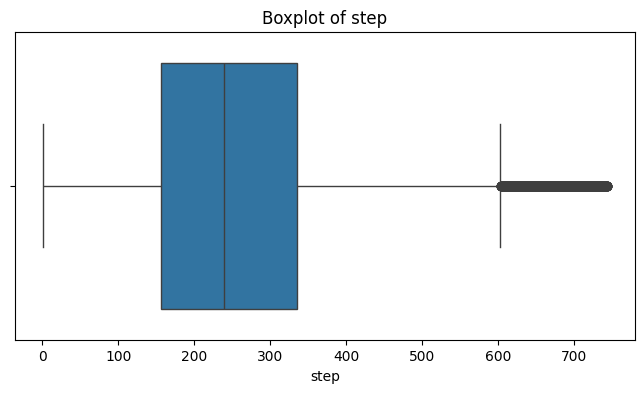

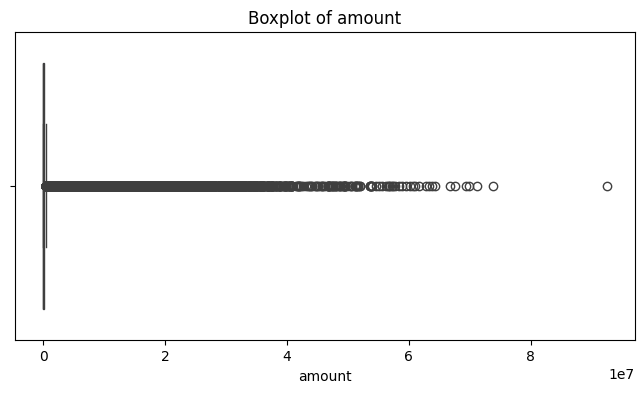

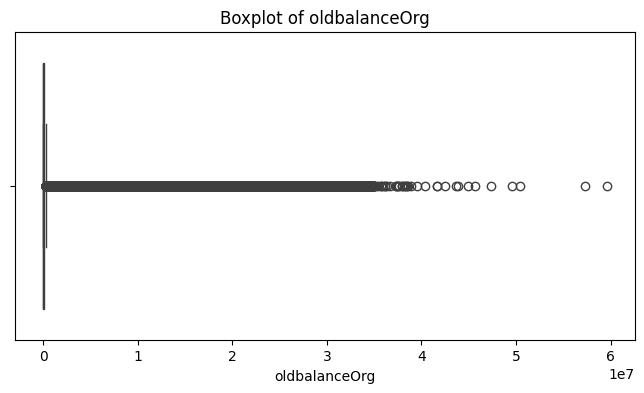

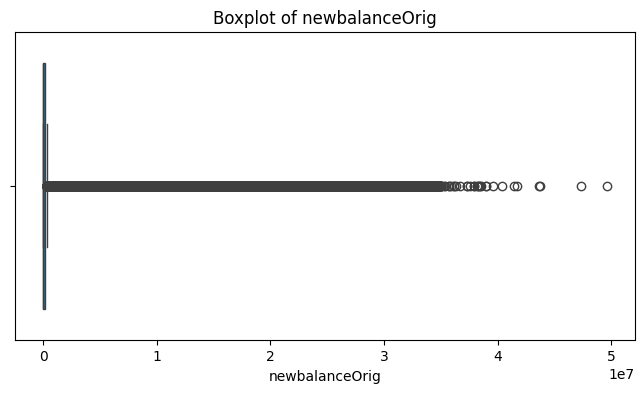

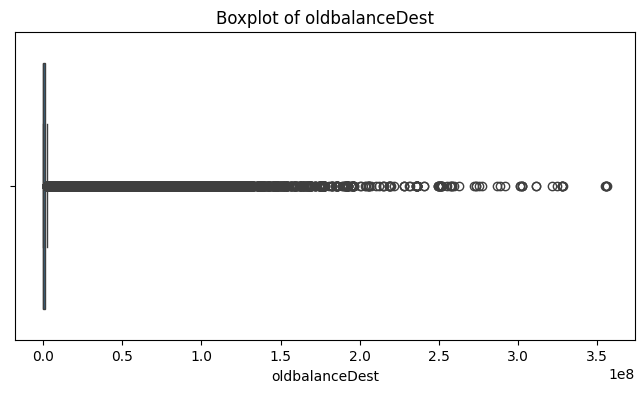

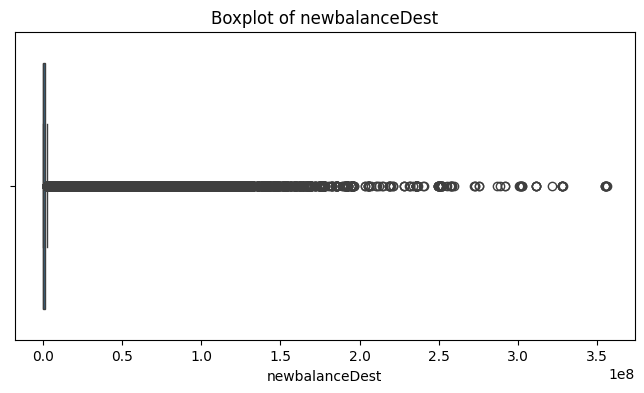

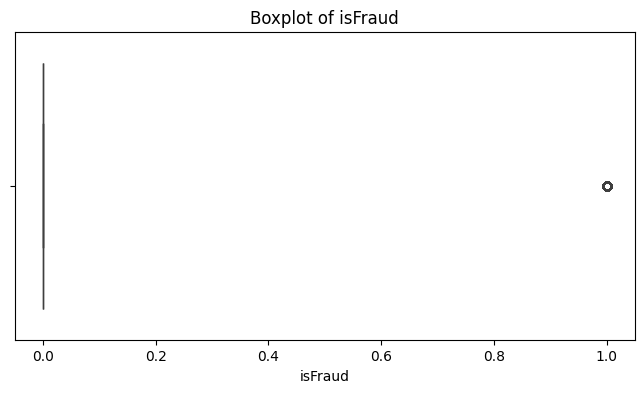

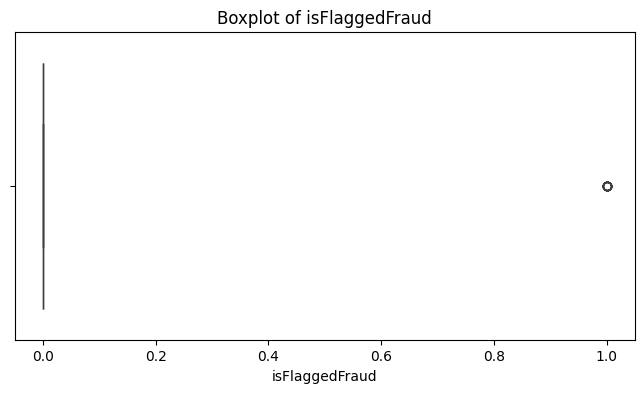

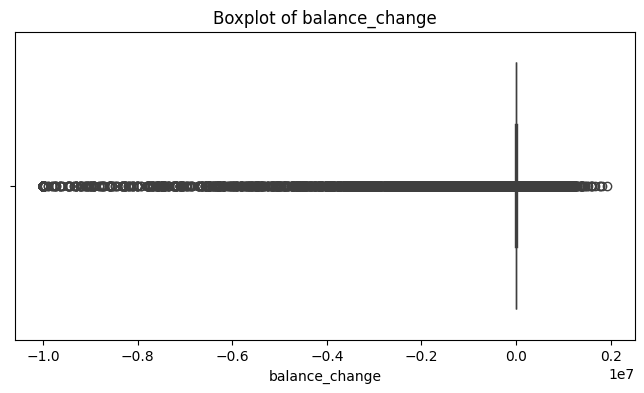

In [36]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

I can't read this/I'm not getting insight from it 

In [37]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import optuna

# Select features and target
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[features]
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 250),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return (preds == y_test).mean()  # accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best parameters:", study.best_params)

# Train final model
best_model = xgb.XGBClassifier(**study.best_params, eval_metric='logloss', use_label_encoder=False)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

[I 2025-07-30 21:18:20,289] A new study created in memory with name: no-name-dc2fc607-71a1-43a7-858a-09846a591a26
c:\Users\farhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:18:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-07-30 21:18:49,546] Trial 0 finished with value: 0.9996251544175199 and parameters: {'max_depth': 10, 'learning_rate': 0.2569608661954279, 'n_estimators': 176, 'subsample': 0.6269024004876964, 'colsample_bytree': 0.7802284081367259}. Best is trial 0 with value: 0.9996251544175199.
c:\Users\farhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:18:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-07-30 21:19:

Best parameters: {'max_depth': 9, 'learning_rate': 0.08073622709480871, 'n_estimators': 246, 'subsample': 0.667794860731827, 'colsample_bytree': 0.5618332801018671}


c:\Users\farhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270873
           1       0.95      0.76      0.84      1651

    accuracy                           1.00   1272524
   macro avg       0.97      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



Saving the trained model

In [39]:
import joblib

joblib.dump(best_model, 'xgboost_fraud_model.joblib')

['xgboost_fraud_model.joblib']

In [40]:
from IPython.display import FileLink

FileLink('xgboost_fraud_model.joblib')

c:\Users\farhan\Downloads\xgboost_fraud_model.joblib